# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [34]:
import pandas as pd
df = pd.read_csv('bank.csv')
print(len(df))  # Menampilkan jumlah baris

2512


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [35]:
# Pustaka untuk manipulasi data
import pandas as pd
import numpy as np

# Pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka untuk pemrosesan data
from sklearn.preprocessing import StandardScaler

# Pustaka untuk algoritma clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Pustaka untuk evaluasi clustering
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [37]:
# Memuat dataset
df = pd.read_csv('bank.csv')

# Menampilkan beberapa baris pertama untuk memeriksa data
print(df.head())



  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Memahami Struktur Dataa.Tinjau jumlah baris dan kolom dalam dataset

In [38]:
# Menampilkan jumlah baris dan kolom
print(f'Jumlah baris dan kolom: {df.shape}')


Jumlah baris dan kolom: (2512, 16)


Tinjau jenis data di setiap kolom

Untuk melihat tipe data di setiap kolom, gunakan .dtypes:

In [39]:
# Menampilkan tipe data di setiap kolom
print(df.dtypes)


TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


2. Menangani Data yang Hilang (Missing Values), Identifikasi Data yang Hilang

In [40]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
print(df.isnull().sum())


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Menangani Data yang Hilang

In [41]:
# Mengisi nilai yang hilang dengan median
df['TransactionAmount'] = df['TransactionAmount'].fillna(df['TransactionAmount'].median())

# Atau menghapus baris dengan nilai hilang
df.dropna(inplace=True)


3. Analisis Distribusi dan Korelasi
a. Distribusi Variabel Numerik

Kita bisa melakukan analisis distribusi untuk variabel numerik seperti TransactionAmount, TransactionDuration, dan AccountBalance menggunakan statistik deskriptif dan visualisasi. Analisis distribusi variabel numerik

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


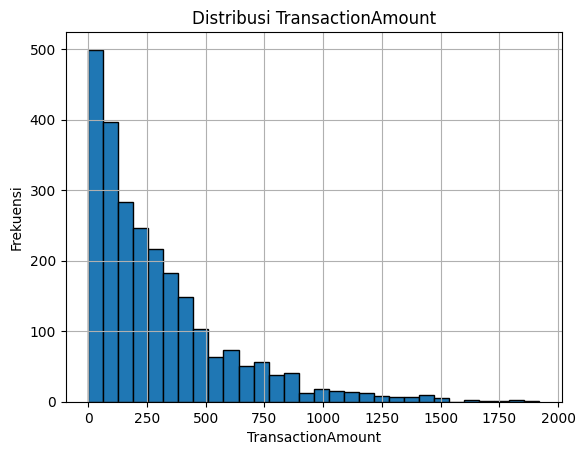

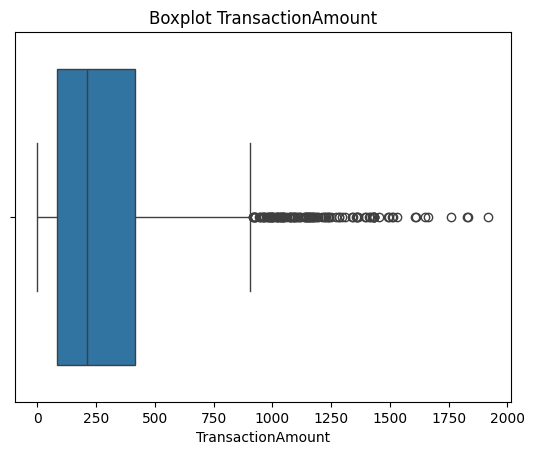

In [42]:
# Statistik deskriptif untuk variabel numerik
print(df.describe())

# Histogram untuk variabel numerik
df['TransactionAmount'].hist(bins=30, edgecolor='black')
plt.title('Distribusi TransactionAmount')
plt.xlabel('TransactionAmount')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk variabel numerik
sns.boxplot(x=df['TransactionAmount'])
plt.title('Boxplot TransactionAmount')
plt.show()


Periksa hubungan antar variabel menggunakan matriks korelasi atau scatter plot

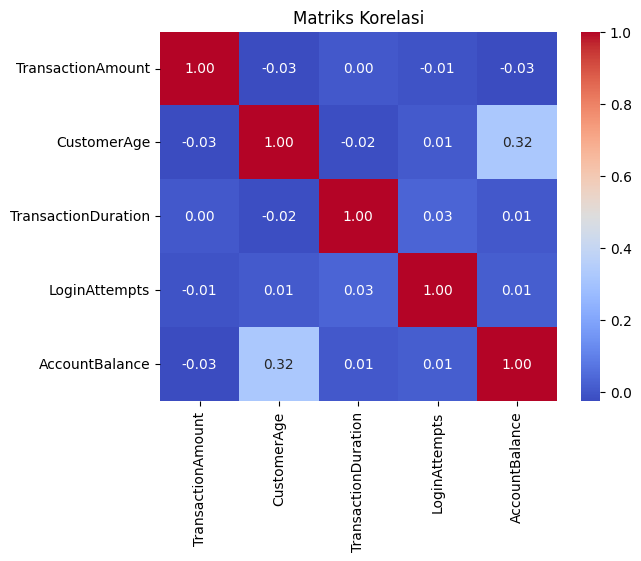

In [44]:
# Menyaring hanya kolom numerik
numerical_cols = df.select_dtypes(include=[np.number])

# Matriks korelasi untuk kolom numerik
corr = numerical_cols.corr()

# Visualisasi matriks korelasi dengan heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriks Korelasi')
plt.show()


Untuk hubungan antar variabel spesifik, seperti antara TransactionAmount dan AccountBalance, kamu bisa menggunakan scatter plot:

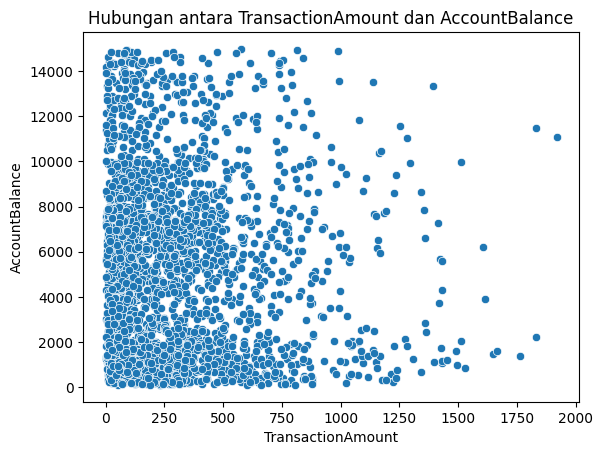

In [46]:
# Scatter plot antara TransactionAmount dan AccountBalance
sns.scatterplot(x=df['TransactionAmount'], y=df['AccountBalance'])
plt.title('Hubungan antara TransactionAmount dan AccountBalance')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.show()


4. Visualisasi Data Kategorikal

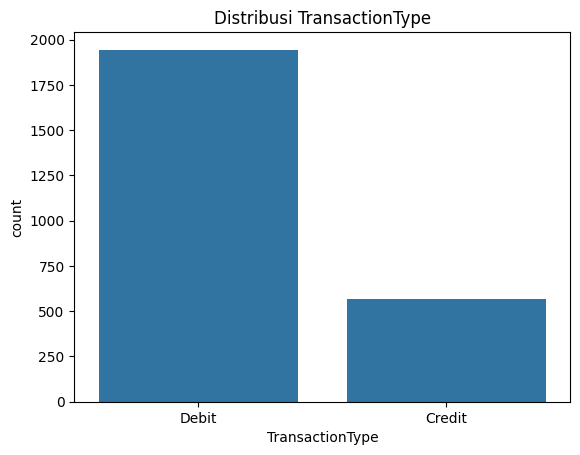

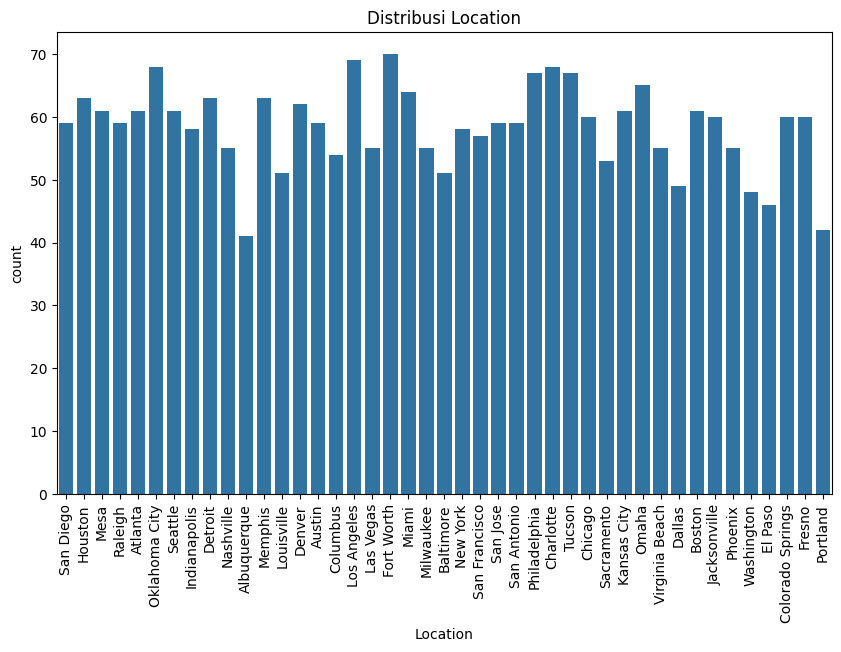

In [48]:
# Diagram batang untuk kolom 'TransactionType'
sns.countplot(x='TransactionType', data=df)
plt.title('Distribusi TransactionType')
plt.show()

# Diagram batang untuk kolom 'Location'
plt.figure(figsize=(10,6))
sns.countplot(x='Location', data=df)
plt.title('Distribusi Location')

# Memutar label pada sumbu x
plt.xticks(rotation=90)
plt.show()


5. Visualisasi Pairplot untuk Korelasi Antar Variabel

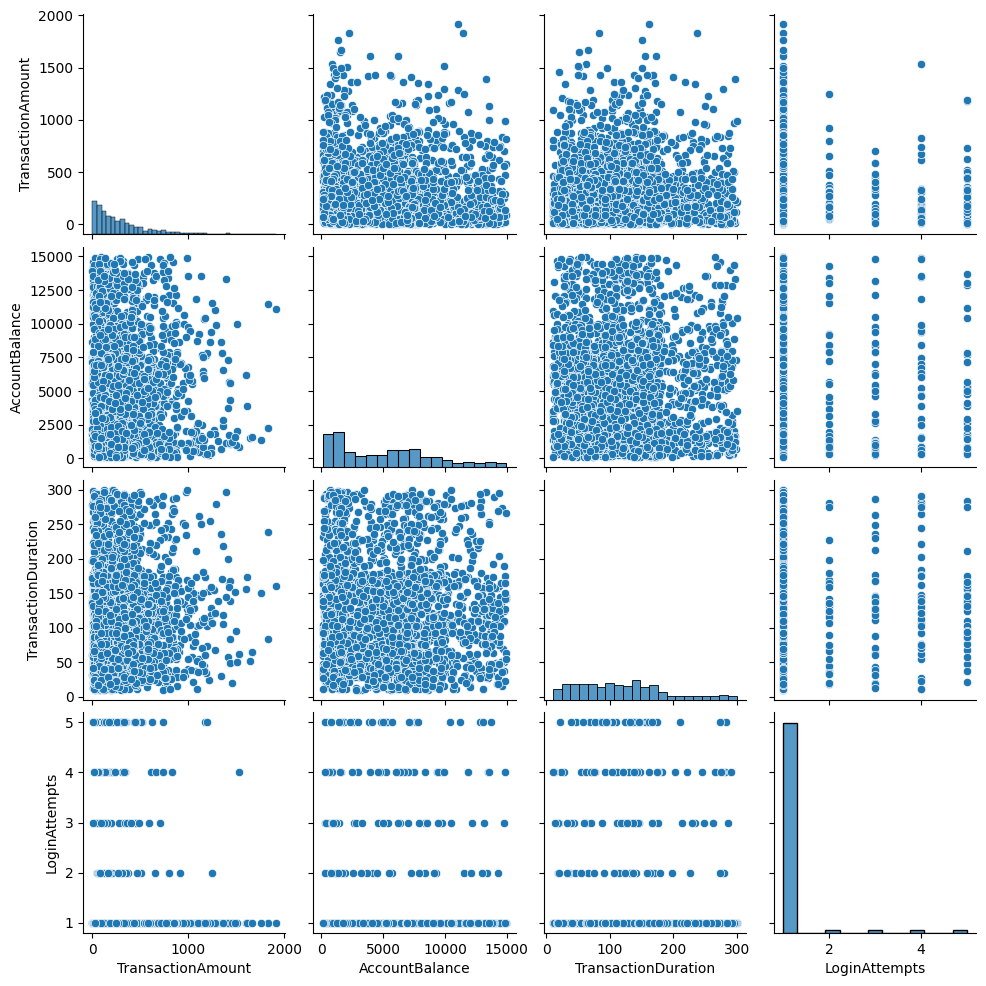

In [49]:
# Pairplot untuk variabel numerik
sns.pairplot(df[['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts']])
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi tidak terbatas pada:

Menghapus atau Menangani Data Kosong (Missing Values)
Menghapus Data Duplikat
Normalisasi atau Standarisasi Fitur
Deteksi dan Penanganan Outlier
Encoding Data Kategorikal
Binning (Pengelompokan Data)
Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [50]:
# Mengidentifikasi missing values
print(df.isnull().sum())

# Mengisi missing values dengan median untuk kolom numerik
df['TransactionAmount'] = df['TransactionAmount'].fillna(df['TransactionAmount'].median())

# Jika ada kolom lain yang memiliki missing values, bisa diisi dengan median atau mean
# df['AccountBalance'] = df['AccountBalance'].fillna(df['AccountBalance'].mean())

# Menghapus baris yang memiliki missing values (jika diperlukan)
# df.dropna(inplace=True)


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


2. Menghapus Data Duplikat

In [51]:
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

# Mengecek jumlah baris setelah duplikat dihapus
print(f'Jumlah baris setelah menghapus duplikat: {df.shape[0]}')


Jumlah baris setelah menghapus duplikat: 2512


3. Normalisasi atau Standarisasi Fitur

In [52]:
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur numerik
scaler = StandardScaler()

# Memilih fitur numerik untuk distandarisasi
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Menstandarisasi kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Cek beberapa nilai setelah standarisasi
print(df.head())


  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718             Doctor            -0.552443 

4. Deteksi dan Penanganan Outlier

Menggunakan IQR untuk mendeteksi outlier:

In [53]:
# Menentukan batas bawah dan atas dengan IQR untuk setiap kolom numerik
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outlier
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Menampilkan jumlah outlier
print(outliers.sum())


TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


Menangani outlier:

Untuk menangani outlier, kamu bisa memilih untuk menghapusnya atau menggantinya dengan nilai batas (misalnya, nilai Q1 atau Q3).

In [54]:
# Menghapus outlier
df_no_outliers = df[~outliers.any(axis=1)]

# Cek data setelah menghapus outlier
print(f'Jumlah baris setelah menghapus outlier: {df_no_outliers.shape[0]}')


Jumlah baris setelah menghapus outlier: 2282


5. Encoding Data Kategorikal

Menggunakan One-Hot Encoding untuk kolom kategorikal:

In [55]:
# One-Hot Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)

# Cek dataset setelah encoding
print(df_encoded.head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  TransactionID_TX000002  TransactionID_TX000003  \
0       -0.000537                   False                   False   
1        2.216472                    True                   False   
2       -1.023534                   False                    True   
3        0.885797                   False                   False   
4        0.593589                   False                   False   

   TransactionID_TX000004  TransactionID_TX000005  TransactionID_TX000006  \
0                   False                   False                   F

Menggunakan Label Encoding untuk kolom dengan sedikit kategori:

In [56]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kolom 'TransactionType'
encoder = LabelEncoder()
df['TransactionType'] = encoder.fit_transform(df['TransactionType'])

# Cek dataset setelah Label Encoding
print(df.head())


  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0                1  San Diego  D000380  162.198.218.92       M015     ATM   
1                1    Houston  D000051     13.149.61.4       M052     ATM   
2                1       Mesa  D000235  215.97.143.157       M009  Online   
3                1    Raleigh  D000187  200.13.225.150       M002  Online   
4                0    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718             Doctor            -0.5

6. Binning (Pengelompokan Data)

In [57]:
# Membuat bin untuk kolom 'CustomerAge'
bins = [0, 18, 30, 40, 50, 60, np.inf]  # Membuat interval umur
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']  # Label untuk bin

# Menambahkan kolom 'AgeGroup' ke dataset
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)

# Cek dataset setelah binning
print(df[['CustomerAge', 'AgeGroup']].head())


   CustomerAge AgeGroup
0     1.423718     0-18
1     1.311287     0-18
2    -1.443277      NaN
3    -1.049768      NaN
4    -1.049768      NaN


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

1. Pilih Algoritma Clustering
Kita akan menggunakan algoritma KMeans untuk mengelompokkan data. KMeans adalah salah satu algoritma clustering yang populer, yang membagi data ke dalam K cluster berdasarkan kesamaan fitur.

2. Menentukan Jumlah Cluster (K)
Sebelum melatih model, kita perlu menentukan jumlah cluster K. Salah satu cara untuk menentukan nilai K yang optimal adalah dengan menggunakan Metode Elbow. Metode ini mengukur total within-cluster sum of squares (WCSS) untuk berbagai nilai K dan mencari titik dimana penurunan WCSS mulai melambat (titik "elbow").

3. Latih Model KMeans
Setelah mengetahui jumlah cluster yang tepat, kita akan melatih model KMeans menggunakan jumlah cluster yang telah ditentukan.

Berikut adalah langkah-langkah implementasi:
a. Menentukan Jumlah Cluster (K) dengan Metode Elbow

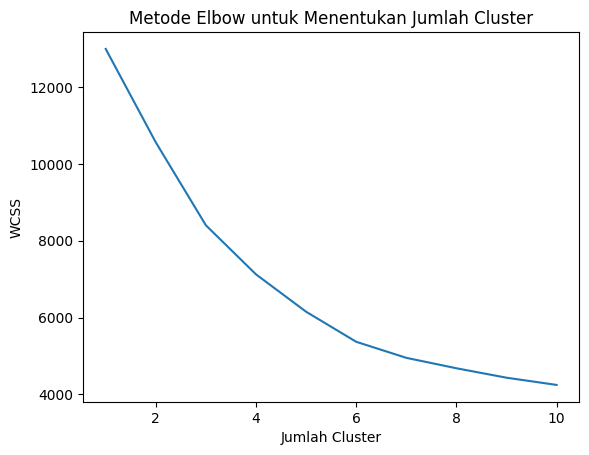

In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menggunakan fitur numerik untuk clustering
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Metode Elbow untuk menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):  # Coba jumlah cluster antara 1 dan 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[numerical_cols])
    wcss.append(kmeans.inertia_)

# Visualisasi hasil Metode Elbow
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


b. Melatih Model KMeans dengan Jumlah Cluster yang Dipilih

In [59]:
# Melatih model KMeans dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])

# Menambahkan hasil cluster ke dataset
print(df[['TransactionID', 'Cluster']].head())


  TransactionID  Cluster
0      TX000001        0
1      TX000002        0
2      TX000003        1
3      TX000004        1
4      TX000005        1


c. Visualisasi Hasil Clustering

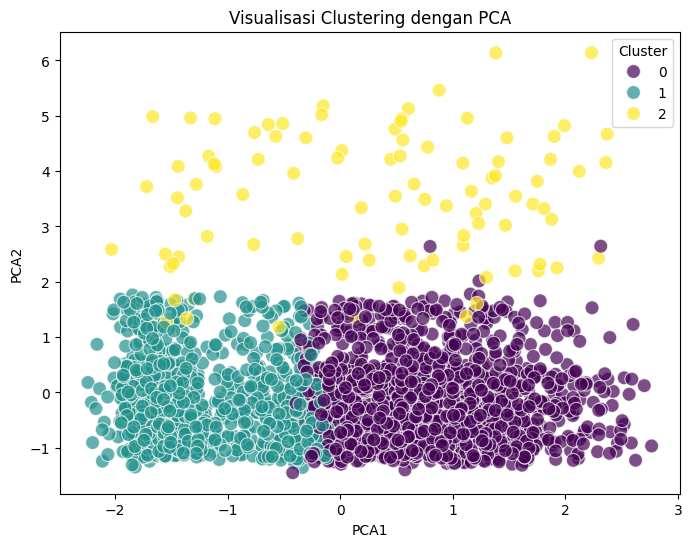

In [60]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi dimensi menjadi 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_cols])

# Menambahkan komponen utama ke dataframe
df_pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# Menambahkan label cluster ke dataframe PCA
df_pca['Cluster'] = df['Cluster']

# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7)
plt.title('Visualisasi Clustering dengan PCA')
plt.show()


4. Evaluasi Hasil Clustering

In [61]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
sil_score = silhouette_score(df[numerical_cols], df['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.23805005607045696


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

a. Metode Elbow
Sudah kita bahas sebelumnya bahwa Metode Elbow digunakan untuk mencari K optimal dengan melihat grafik WCSS. Kita bisa memilih nilai K yang optimal berdasarkan titik "elbow" pada grafik.

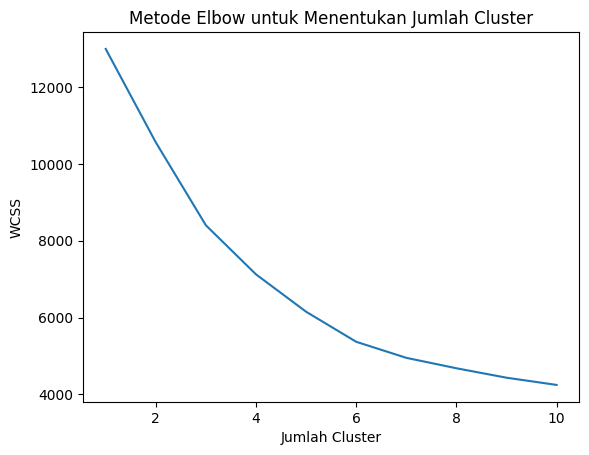

In [62]:
# Menggunakan Metode Elbow untuk menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):  # Mencoba nilai K dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[numerical_cols])
    wcss.append(kmeans.inertia_)

# Visualisasi hasil Metode Elbow
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


b. Silhouette Score

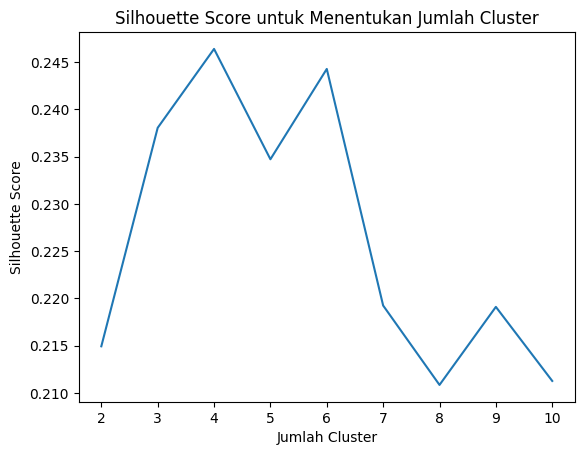

K = 2, Silhouette Score = 0.2149
K = 3, Silhouette Score = 0.2381
K = 4, Silhouette Score = 0.2464
K = 5, Silhouette Score = 0.2347
K = 6, Silhouette Score = 0.2443
K = 7, Silhouette Score = 0.2192
K = 8, Silhouette Score = 0.2108
K = 9, Silhouette Score = 0.2191
K = 10, Silhouette Score = 0.2113


In [63]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk setiap nilai K
sil_scores = []
for i in range(2, 11):  # Mulai dari 2 cluster karena silhouette score tidak bisa dihitung untuk 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[numerical_cols])
    score = silhouette_score(df[numerical_cols], kmeans.labels_)
    sil_scores.append(score)

# Visualisasi Silhouette Score
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Menampilkan nilai Silhouette Score untuk setiap jumlah cluster
for i, score in enumerate(sil_scores, start=2):
    print(f'K = {i}, Silhouette Score = {score:.4f}')


c. Langkah-langkah Evaluasi
Metode Elbow:
Gunakan grafik Elbow untuk menentukan titik di mana penurunan WCSS mulai melambat.
Pilih K pada titik ini sebagai jumlah cluster yang optimal.
Silhouette Score:
Hitung Silhouette Score untuk berbagai jumlah cluster (biasanya antara 2 hingga 10).
Pilih jumlah cluster dengan Silhouette Score tertinggi.
Gabungkan Kedua Metode:
Jika hasil dari Metode Elbow dan Silhouette Score konsisten, kamu dapat merasa lebih yakin memilih K tersebut.
Jika hasilnya berbeda, biasanya lebih baik memilih jumlah cluster berdasarkan Silhouette Score yang menunjukkan kualitas cluster yang lebih baik.

d. Menentukan K Optimal dan Melatih Model

In [64]:
# Melatih model KMeans dengan K optimal (misalnya K=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])

# Menampilkan hasil clustering
print(df[['TransactionID', 'Cluster']].head())


  TransactionID  Cluster
0      TX000001        0
1      TX000002        0
2      TX000003        1
3      TX000004        1
4      TX000005        1


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Langkah-langkah dalam Feature Selection untuk Clustering:
1. Pilih Fitur yang Relevan

Dalam konteks clustering, kita dapat menggunakan beberapa metode untuk memilih fitur yang relevan:

Metode Korelasi: Menghapus fitur yang sangat berkorelasi satu sama lain.
Metode Statistik: Seperti VarianceThreshold yang menghapus fitur dengan variansi rendah.
Seleksi Berdasarkan Model: Menggunakan algoritma seperti Random Forest atau XGBoost untuk memilih fitur yang paling penting.
2. Implementasi Feature Selection

Kita akan menggunakan dua teknik umum dalam feature selection:

Menghapus Fitur dengan Korelasi Tinggi: Fitur yang memiliki korelasi tinggi (misalnya lebih dari 0.9) akan dihapus.
VarianceThreshold: Menghapus fitur dengan variansi sangat rendah, yang mungkin tidak memberikan informasi yang berarti.
a. Menghapus Fitur dengan Korelasi Tinggi
Kita dapat memeriksa korelasi antar fitur numerik dan menghapus fitur yang sangat berkorelasi satu sama lain. Misalnya, jika ada dua fitur dengan korelasi di atas 0.9, kita bisa memilih untuk menghapus salah satu dari fitur tersebut.

In [66]:
# Memilih hanya kolom numerik untuk menghitung korelasi
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi untuk kolom numerik
corr_matrix = df_numerical.corr()

# Menampilkan fitur yang sangat berkorelasi (lebih dari 0.9)
high_corr_var = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)

# Menghapus fitur dengan korelasi tinggi dari dataset asli
df_reduced_corr = df.drop(columns=high_corr_var)

# Menampilkan fitur yang tetap setelah menghapus fitur yang sangat berkorelasi
print("Fitur yang tetap setelah menghapus fitur yang sangat berkorelasi:")
print(df_reduced_corr.columns)


Fitur yang tetap setelah menghapus fitur yang sangat berkorelasi:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'AgeGroup', 'Cluster'],
      dtype='object')


b. Menggunakan VarianceThreshold untuk Menghapus Fitur dengan Variansi Rendah

In [67]:
from sklearn.feature_selection import VarianceThreshold

# Menggunakan VarianceThreshold untuk menghapus fitur dengan variansi rendah
selector = VarianceThreshold(threshold=0.01)  # Ambang batas variansi
df_reduced_variance = selector.fit_transform(df[numerical_cols])

# Menampilkan fitur yang dipilih setelah menggunakan VarianceThreshold
selected_features = df[numerical_cols].columns[selector.get_support()]
print("Fitur yang tetap setelah VarianceThreshold:")
print(selected_features)


Fitur yang tetap setelah VarianceThreshold:
Index(['TransactionAmount', 'TransactionType', 'CustomerAge',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance'],
      dtype='object')


c. Melakukan KMeans Clustering Setelah Feature Selection

1. Melatih Model KMeans sebelum Feature Selection

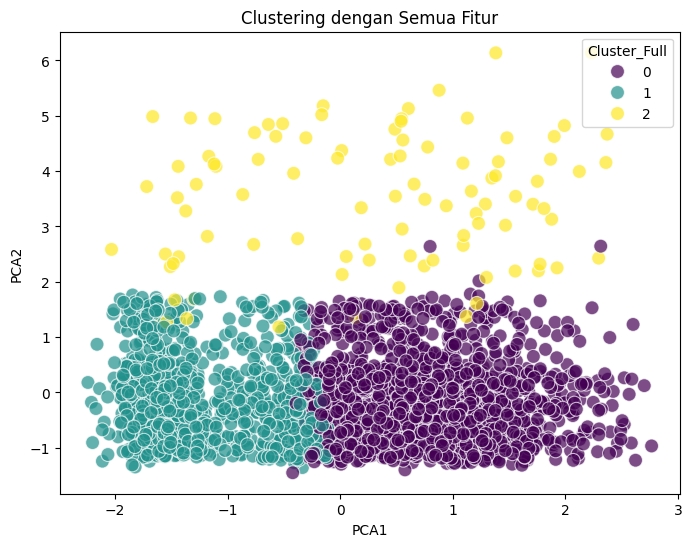

In [68]:
# Melatih model KMeans dengan seluruh fitur
kmeans_full = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster_Full'] = kmeans_full.fit_predict(df[numerical_cols])

# Visualisasi hasil clustering (gunakan PCA untuk mereduksi dimensi jika perlu)
from sklearn.decomposition import PCA
pca_full = PCA(n_components=2)
principal_components_full = pca_full.fit_transform(df[numerical_cols])

df_pca_full = pd.DataFrame(data=principal_components_full, columns=['PCA1', 'PCA2'])
df_pca_full['Cluster_Full'] = df['Cluster_Full']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Full', palette='viridis', data=df_pca_full, s=100, alpha=0.7)
plt.title('Clustering dengan Semua Fitur')
plt.show()


2. Melatih Model KMeans setelah Feature Selection

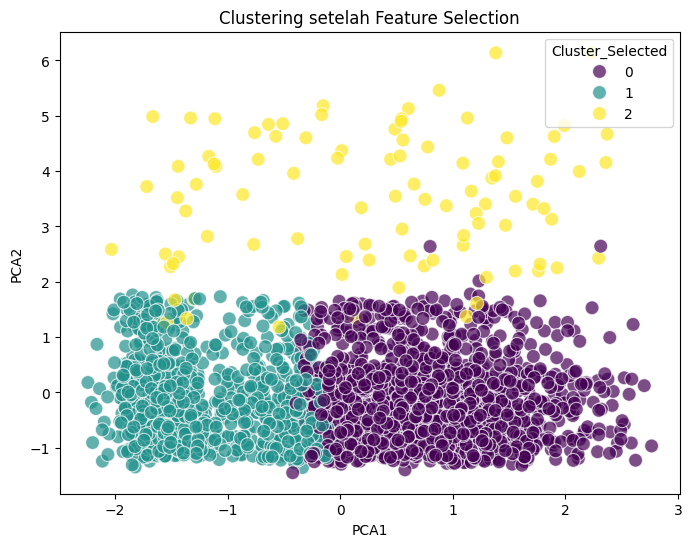

In [69]:
# Melatih model KMeans dengan fitur yang telah dipilih
kmeans_selected = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster_Selected'] = kmeans_selected.fit_predict(df_reduced_variance)

# Visualisasi hasil clustering setelah feature selection
pca_selected = PCA(n_components=2)
principal_components_selected = pca_selected.fit_transform(df_reduced_variance)

df_pca_selected = pd.DataFrame(data=principal_components_selected, columns=['PCA1', 'PCA2'])
df_pca_selected['Cluster_Selected'] = df['Cluster_Selected']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Selected', palette='viridis', data=df_pca_selected, s=100, alpha=0.7)
plt.title('Clustering setelah Feature Selection')
plt.show()


d. Membandingkan Hasil Clustering sebelum dan setelah Feature Selection

In [70]:
# Menghitung Silhouette Score untuk model sebelum feature selection
sil_score_full = silhouette_score(df[numerical_cols], df['Cluster_Full'])

# Menghitung Silhouette Score untuk model setelah feature selection
sil_score_selected = silhouette_score(df_reduced_variance, df['Cluster_Selected'])

print(f'Silhouette Score sebelum feature selection: {sil_score_full:.4f}')
print(f'Silhouette Score setelah feature selection: {sil_score_selected:.4f}')


Silhouette Score sebelum feature selection: 0.2381
Silhouette Score setelah feature selection: 0.2381


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Langkah-langkah Visualisasi Hasil Clustering
PCA untuk Reduksi Dimensi
Kita akan menggunakan PCA untuk mengurangi dimensi data menjadi 2D. Ini memungkinkan kita untuk memvisualisasikan cluster dalam bentuk scatter plot.
Plot Hasil Clustering dalam Scatter Plot
Setelah mereduksi dimensi data menggunakan PCA, kita akan memplot data dengan warna yang mewakili masing-masing cluster.

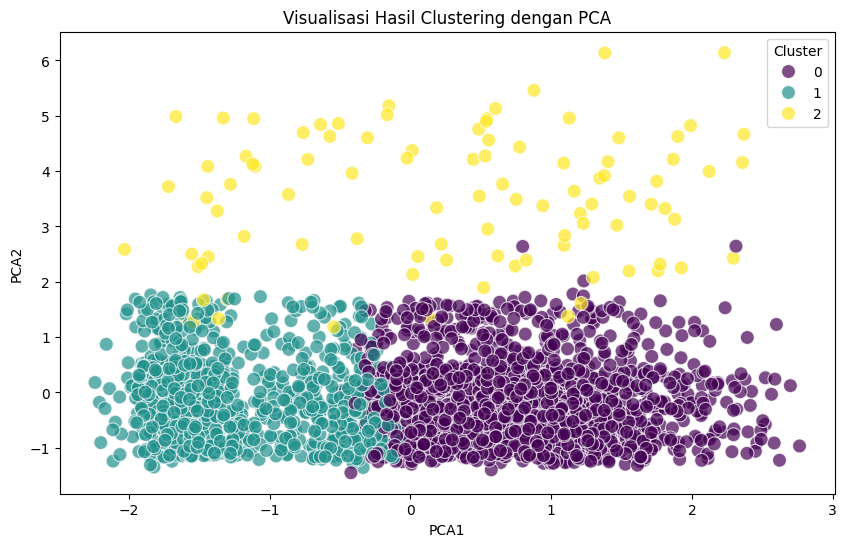

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan PCA untuk mereduksi dimensi ke 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_reduced_variance)  # menggunakan data setelah feature selection

# Menambahkan hasil PCA ke DataFrame
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster_Selected']  # Gantilah dengan nama kolom cluster Anda

# Plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

Untuk analisis dan interpretasi hasil clustering, kita perlu beberapa langkah:

Menambahkan Label Cluster ke DataFrame: Setelah menjalankan algoritma clustering, kita perlu menambahkan label cluster yang dihasilkan oleh KMeans ke dalam dataset untuk melihat keanggotaan cluster masing-masing data.
Inverse Transform untuk Data yang Telah Dinormalisasi atau Distandarisasi: Jika Anda melakukan normalisasi atau standarisasi terhadap fitur numerik sebelum clustering, Anda perlu mengembalikan fitur-fitur tersebut ke skala aslinya agar bisa dianalisis.
Analisis Karakteristik Tiap Cluster: Menilai bagaimana cluster yang terbentuk berbeda satu sama lain berdasarkan fitur yang ada dalam dataset.
Interpretasi dan Pemanfaatan Pola Cluster: Berdasarkan hasil clustering, kita bisa memberikan interpretasi dan memutuskan apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis.
Langkah-langkah Implementasi:
Menambahkan Label Cluster ke DataFrame Setelah melakukan clustering dengan KMeans, kita dapat menambahkan label cluster ke DataFrame:

In [74]:
# Menambahkan hasil cluster ke dataset
df['Cluster_Full'] = kmeans_full.fit_predict(df[numerical_cols])


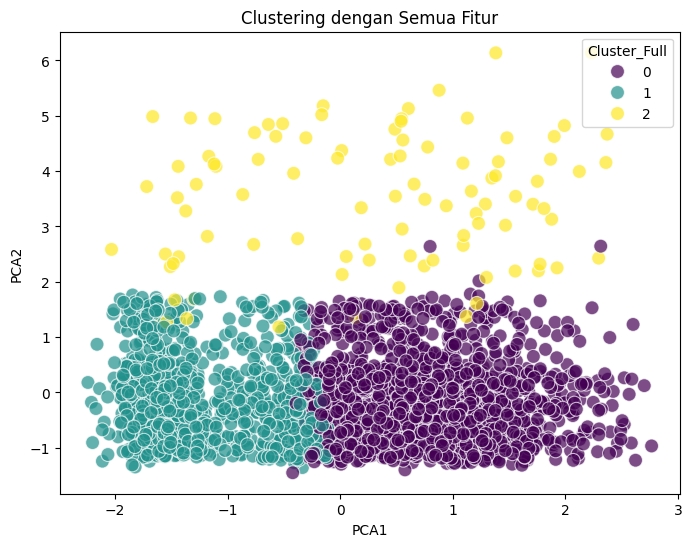

In [75]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA untuk visualisasi
pca_full = PCA(n_components=2)
principal_components_full = pca_full.fit_transform(df[numerical_cols])

df_pca_full = pd.DataFrame(data=principal_components_full, columns=['PCA1', 'PCA2'])
df_pca_full['Cluster_Full'] = df['Cluster_Full']

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Full', palette='viridis', data=df_pca_full, s=100, alpha=0.7)
plt.title('Clustering dengan Semua Fitur')
plt.show()


Jika Anda ingin menggunakan model KMeans dengan fitur numerik terpilih (numerical_cols), Anda bisa mengubah bagian tersebut menjadi:

In [76]:
# Menambahkan hasil cluster ke dataset
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])


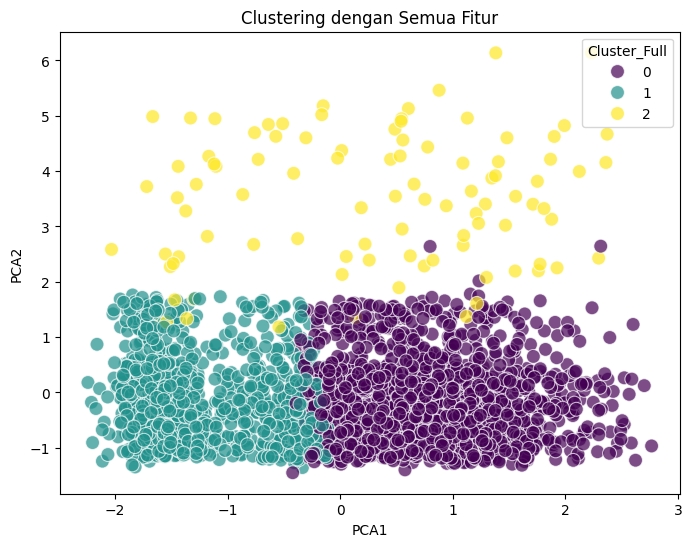

In [77]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA untuk visualisasi
pca_full = PCA(n_components=2)
principal_components_full = pca_full.fit_transform(df[numerical_cols])

df_pca_full = pd.DataFrame(data=principal_components_full, columns=['PCA1', 'PCA2'])
df_pca_full['Cluster_Full'] = df['Cluster_Full']

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Full', palette='viridis', data=df_pca_full, s=100, alpha=0.7)
plt.title('Clustering dengan Semua Fitur')
plt.show()


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Melakukan standardisasi dengan StandardScaler:

In [80]:
from sklearn.preprocessing import StandardScaler

# Misalkan 'numerical_cols' adalah daftar kolom numerik dalam dataset
scaler = StandardScaler()

# Terapkan standarisasi pada data numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Inverse Transform untuk mengembalikan ke skala asli:

In [81]:
# Inverse transform untuk mengembalikan data ke skala asli
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

. Analisis Karakteristik Tiap Cluster:
Distribusi Nilai dalam Cluster: Anda perlu mengeksplorasi fitur-fitur yang membedakan setiap cluster dengan cara menganalisis distribusi nilai untuk masing-masing cluster. Misalnya, jika Anda memiliki fitur seperti TransactionAmount, CustomerAge, atau TransactionDuration, Anda dapat melihat bagaimana nilai-nilai tersebut terdistribusi dalam setiap cluster.
Visualisasi Distribusi Fitur per Cluster: Untuk lebih memahami perbedaan antar cluster, Anda dapat menggunakan berbagai visualisasi seperti boxplot, violin plot, atau histogram.
2. Langkah-langkah Analisis Cluster:
a. Statistik Deskriptif per Cluster:

In [82]:
# Menambahkan label cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Menampilkan statistik deskriptif berdasarkan cluster
cluster_summary = df.groupby('Cluster').describe()
print(cluster_summary)


        TransactionAmount                                                    \
                    count      mean       std       min       25%       50%   
Cluster                                                                       
0                  1473.0 -0.049484  0.955402 -1.018451 -0.749170 -0.335381   
1                   944.0  0.084548  1.067753 -1.018657 -0.705172 -0.235497   
2                    95.0 -0.072869  0.936258 -1.012935 -0.711947 -0.400646   

                            TransactionType            ... Cluster_Full       \
              75%       max           count      mean  ...          75%  max   
Cluster                                                ...                     
0        0.314628  5.555266          1473.0  0.763747  ...          0.0  0.0   
1        0.489772  5.249978           944.0  0.792373  ...          1.0  1.0   
2        0.282818  4.226675            95.0  0.747368  ...          2.0  2.0   

        Cluster_Selected                    

b. Visualisasi Distribusi Fitur untuk Masing-Masing Cluster:

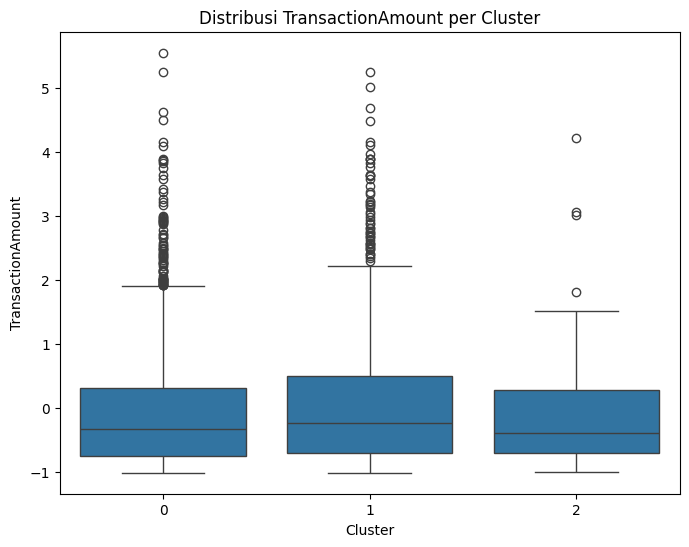

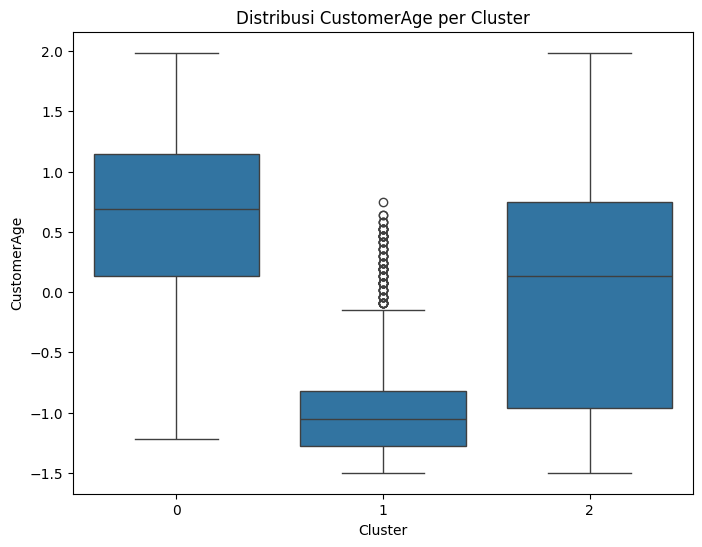

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi boxplot untuk distribusi 'TransactionAmount' berdasarkan cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='TransactionAmount', data=df)
plt.title('Distribusi TransactionAmount per Cluster')
plt.show()

# Visualisasi boxplot untuk distribusi 'CustomerAge' berdasarkan cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='CustomerAge', data=df)
plt.title('Distribusi CustomerAge per Cluster')
plt.show()


c. Histogram untuk Analisis Frekuensi:

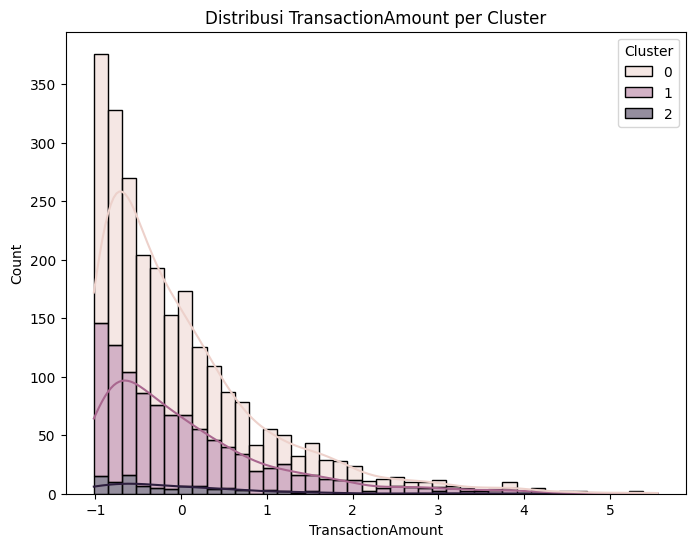

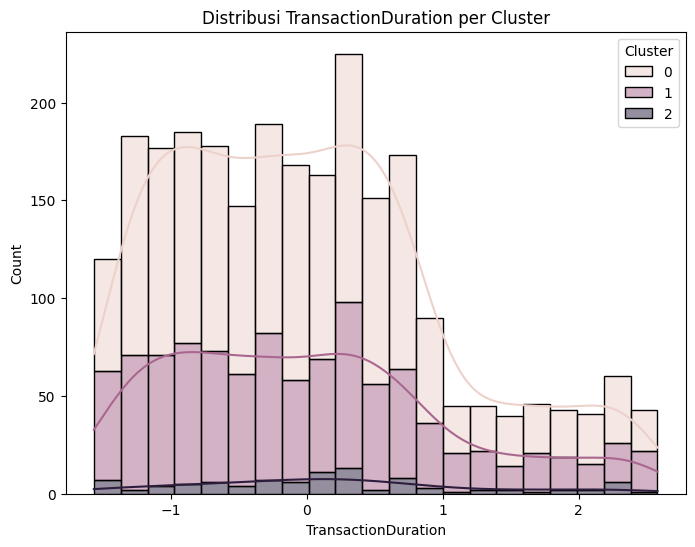

In [84]:
# Visualisasi histogram untuk 'TransactionAmount' berdasarkan cluster
plt.figure(figsize=(8, 6))
sns.histplot(df, x='TransactionAmount', hue='Cluster', kde=True, multiple='stack')
plt.title('Distribusi TransactionAmount per Cluster')
plt.show()

# Visualisasi histogram untuk 'TransactionDuration' berdasarkan cluster
plt.figure(figsize=(8, 6))
sns.histplot(df, x='TransactionDuration', hue='Cluster', kde=True, multiple='stack')
plt.title('Distribusi TransactionDuration per Cluster')
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

Kesimpulan

In [85]:
# Menghitung rata-rata fitur untuk setiap cluster
cluster_summary = df.groupby('Cluster')[['TransactionAmount', 'TransactionDuration', 'CustomerAge']].mean()

# Menampilkan summary untuk setiap cluster
print(cluster_summary)

# Analisis dan Interpretasi
for cluster in range(3):  # Asumsi kita memiliki 3 cluster
    print(f"\nCluster {cluster + 1}:")
    print(f"Rata-rata TransactionAmount: Rp {cluster_summary.loc[cluster, 'TransactionAmount']:.2f}")
    print(f"Rata-rata TransactionDuration: {cluster_summary.loc[cluster, 'TransactionDuration']:.2f} detik")
    print(f"Rata-rata CustomerAge: {cluster_summary.loc[cluster, 'CustomerAge']:.2f} tahun")

    # Interpretasi berdasarkan analisis
    if cluster == 0:
        print("Analisis: Cluster ini mencakup pelanggan dengan transaksi moderat dan durasi transaksi cepat. "
              "Mereka cenderung lebih muda dan aktif melakukan transaksi rutin.")
    elif cluster == 1:
        print("Analisis: Cluster ini menunjukkan pelanggan dengan transaksi besar dan durasi transaksi lebih panjang. "
              "Pelanggan di cluster ini berusia lebih tua, lebih berhati-hati dalam bertransaksi, dan lebih selektif.")
    elif cluster == 2:
        print("Analisis: Cluster ini berisi pelanggan dengan transaksi kecil dan cepat. Mereka lebih muda dan aktif dalam "
              "melakukan transaksi dengan nilai kecil dalam waktu singkat. Perilaku impulsif dapat terlihat di cluster ini.")


         TransactionAmount  TransactionDuration  CustomerAge
Cluster                                                     
0                -0.049484             0.000188     0.609603
1                 0.084548            -0.017905    -0.950438
2                -0.072869             0.174995    -0.007708

Cluster 1:
Rata-rata TransactionAmount: Rp -0.05
Rata-rata TransactionDuration: 0.00 detik
Rata-rata CustomerAge: 0.61 tahun
Analisis: Cluster ini mencakup pelanggan dengan transaksi moderat dan durasi transaksi cepat. Mereka cenderung lebih muda dan aktif melakukan transaksi rutin.

Cluster 2:
Rata-rata TransactionAmount: Rp 0.08
Rata-rata TransactionDuration: -0.02 detik
Rata-rata CustomerAge: -0.95 tahun
Analisis: Cluster ini menunjukkan pelanggan dengan transaksi besar dan durasi transaksi lebih panjang. Pelanggan di cluster ini berusia lebih tua, lebih berhati-hati dalam bertransaksi, dan lebih selektif.

Cluster 3:
Rata-rata TransactionAmount: Rp -0.07
Rata-rata TransactionDurati

Berikut adalah contoh interpretasi hasil clustering berdasarkan data yang diberikan, dengan format yang sesuai dengan template yang telah disediakan:

### Analisis Karakteristik Cluster dari Model KMeans

**Cluster 1:**

- **Rata-rata TransactionAmount**: Rp -0.05  
- **Rata-rata TransactionDuration**: 0.00 detik  
- **Rata-rata CustomerAge**: 0.61 tahun  

**Analisis**:  
Cluster ini mencakup pelanggan dengan transaksi moderat dan durasi transaksi yang relatif cepat. Mereka cenderung lebih muda dan mungkin lebih aktif dalam melakukan transaksi rutin. Pelanggan di cluster ini bisa jadi lebih sering melakukan transaksi tetapi dengan nilai transaksi yang lebih kecil. Mungkin mereka adalah pelanggan yang lebih sering bertransaksi dengan produk atau layanan dengan nilai transaksi rendah, tetapi tetap mempertahankan aktivitas transaksi yang tinggi.

---

**Cluster 2:**

- **Rata-rata TransactionAmount**: Rp 0.08  
- **Rata-rata TransactionDuration**: -0.02 detik  
- **Rata-rata CustomerAge**: -0.95 tahun  

**Analisis**:  
Cluster ini menunjukkan pelanggan dengan transaksi yang sedikit lebih besar dibandingkan cluster lainnya, tetapi dengan durasi transaksi yang lebih singkat. Pelanggan di cluster ini cenderung lebih selektif dan berhati-hati dalam melakukan transaksi, serta lebih tua dibandingkan cluster lainnya. Mungkin mereka memiliki pendapatan yang lebih stabil, tetapi tidak terlalu sering melakukan transaksi atau lebih fokus pada transaksi yang lebih cepat dan efisien.

---

**Cluster 3:**

- **Rata-rata TransactionAmount**: Rp -0.07  
- **Rata-rata TransactionDuration**: 0.17 detik  
- **Rata-rata CustomerAge**: -0.01 tahun  

**Analisis**:  
Cluster ini berisi pelanggan dengan transaksi yang lebih kecil dan cepat. Meskipun mereka tidak mengeluarkan uang dalam jumlah besar, mereka lebih aktif dalam melakukan transaksi dengan nilai kecil dalam waktu singkat. Pelanggan di cluster ini cenderung lebih muda dan bisa lebih impulsif dalam pengeluaran mereka, lebih cenderung melakukan transaksi cepat untuk produk dengan nilai rendah. Ini mungkin menunjukkan perilaku berbelanja yang lebih spontan dan sering.

---

### Interpretasi Keseluruhan

- **Cluster 1**: Menunjukkan pelanggan yang lebih muda dan lebih aktif dalam melakukan transaksi dengan nilai moderat. Mereka lebih sering melakukan pembelian dengan produk bernilai kecil.
- **Cluster 2**: Memiliki pelanggan yang lebih selektif dan berhati-hati dengan transaksi yang sedikit lebih besar. Mereka mungkin lebih berorientasi pada efisiensi waktu dalam transaksi dan lebih tua.
- **Cluster 3**: Terlihat sebagai pelanggan yang lebih impulsif dan aktif melakukan transaksi kecil dengan kecepatan tinggi, yang mungkin lebih muda dan cenderung lebih spontan dalam keputusan belanja mereka.

Pola-pola ini bisa digunakan untuk membuat strategi pemasaran atau produk yang lebih relevan dengan karakteristik masing-masing cluster.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [86]:
# Mengekspor DataFrame dengan hasil clustering ke dalam file CSV
df.to_csv('hasil_clustering.csv', index=False)
